In [1]:
import pandas as pnd

In [2]:
%load_ext rpy2.ipython
%R library(tidyverse)
%R library(patchwork)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



array(['patchwork', 'forcats', 'stringr', 'dplyr', 'purrr', 'readr',
       'tidyr', 'tibble', 'ggplot2', 'tidyverse', 'tools', 'stats',
       'graphics', 'grDevices', 'utils', 'datasets', 'methods', 'base'],
      dtype='<U9')

In [11]:
metrics = pnd.read_csv('results/simdata_metrics_ExpQ_Exp_ExpQ_empirical.csv')

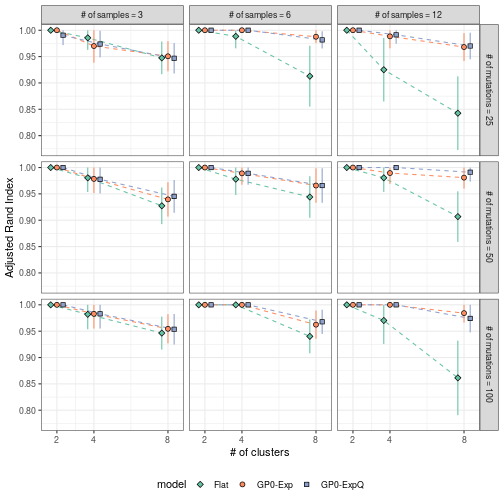

In [12]:
%%R -i metrics -w 7 -h 7 --units in

auxfcn = function(metrics) {
    metrics %>%
        filter((LIK == 'Bin')) %>%
        mutate(PRIOR = if_else(PRIOR == 'Flat', PRIOR, str_c(PRIOR, COV, sep='-'))) %>%
        pivot_longer(c('ARI', 'AMI', 'FMI', 'RMSE'), names_to = 'METRIC', values_to = 'VALUE') %>%
        filter(METRIC %in% c('ARI')) %>%    
        group_by(NCLUSTERS, NSAMPLES, NMUTS, PRIOR, METRIC) %>%
        summarise(LOC = mean(VALUE), SD = sd(VALUE), SE = SD / sqrt(n()), LO = max(0, LOC - 1.96*SE), HI = min(1, LOC + 1.96*SE)) %>%
        ungroup() %>%
        ggplot() +
        geom_line(aes(x = NCLUSTERS, y = LOC, color=PRIOR), position = position_dodge(width=1), show.legend = F, linetype = 'dashed') +    
        geom_linerange(aes(x = NCLUSTERS, ymin = LO, ymax = HI, color = PRIOR), position = position_dodge(width=1), show.legend = F) +    
        geom_point(aes(x = NCLUSTERS, y = LOC, fill = PRIOR, shape = PRIOR), size=2, position = position_dodge(width=1)) +    
        facet_grid(NMUTS ~ NSAMPLES, labeller = labeller(NSAMPLES = function(val) str_c('# of samples = ', val),
                                                         NMUTS = function(val) str_c('# of mutations = ', val))) +
        theme_bw() +
        theme(legend.position = 'bottom') +
        scale_x_continuous(breaks = c(2, 4, 8)) +
        scale_fill_brewer(palette = 'Set2') +
        scale_color_brewer(palette = 'Set2') + 
        scale_shape_manual(values = c(23, 21, 22)) +
        labs(x = '# of clusters', y = 'Adjusted Rand Index', fill = 'model', shape = 'model')        
}

auxfcn(metrics)

# ggsave('tmp.pdf')